In [78]:
# importing libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Q1. solving th system of linear equation

In [60]:

def module(U,t):
    sigma = 10
    P = 28
    beta = 8/3
    x,y,z = U
    dxdt = sigma * (y - x)
    dydt = x * (P - z) - y
    dzdt = (x * y) - (beta * z)
    return(dxdt,dydt,dzdt)


In [61]:
# initial conditions
x = 7
y = 7
z = 7
tSpan = np.linspace(0,20,1000)


In [62]:
# solving system of linear equation using scipys odeint module
initial_condition = [x,y,z]

solution =odeint(module,initial_condition,tSpan) 

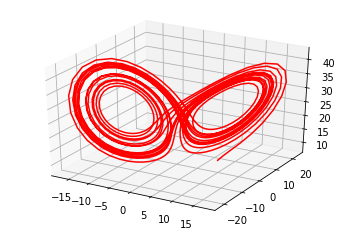

In [63]:
# plotting differential equations
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xdata = solution[:,0]
ydata = solution[:,1]
zdata = solution[:,2]
ax.plot3D(xdata, ydata, zdata, 'red')

plt.show()

### Q 2.Generate plot for each time step

In [71]:
# creating folder to which plots to be saved
folder =  'D:/rani/Final_plots'


In [72]:
def gen_plot(solution, n):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    x = solution[:, 0]
    y = solution[:, 1]
    z = solution[:, 2]
    ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.7)
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    
    
    plt.savefig('{}/{:03d}.png'.format(folder, n), dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()

In [73]:
# return a list in iteratively larger values
def gen_values(list, size):
    size = max(1, size)
    plot = [list[0:i] for i in range(1, len(list) + 1, size)]
    return plot

In [74]:
# get incrementally larger values of the time points
value = gen_values(tSpan, size=20)

In [75]:
# get the points to plot, one value of time steps at a time, by integrating the system of equations
points = [odeint(module, initial_condition, value) for value in value]

In [76]:
# plot each set of points, one at a timestep, saving each plot
for n, point in enumerate(points):
    gen_plot(point, n)

## Q3. create animation

In [8]:
# importing required libraries for animation
from matplotlib import animation
from matplotlib.animation import FuncAnimation,FFMpegFileWriter
import warnings
warnings.filterwarnings('ignore')
import mpl_toolkits.mplot3d.axes3d as p3

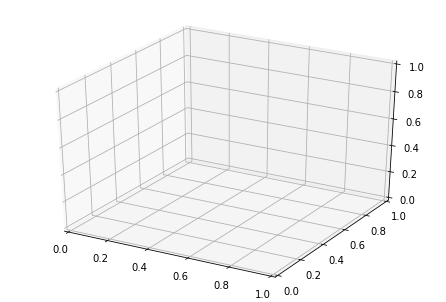

In [10]:

ntraj = 10

colors = plt.cm.viridis(np.linspace(0, 1, ntraj))
x0 = -15 + 30 * np.random.random((ntraj, 3))

data = np.asarray([odeint(module, x0i, tSpan)
                      for x0i in x0])

lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]
# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

In [14]:
def init():
    for i in range(len(lines)):
        line = lines[i]
        return line,

In [56]:
def animate(i):
    for line, dat in zip(lines, data):
        x = dat[:, 0].T
        y = dat[:, 1].T
        z = dat[:, 2].T

        line.set_data(x, y)
        line.set_3d_properties(z)

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return line,

In [57]:
ani = animation.FuncAnimation(fig, animate, init_func=init,
                     blit=True, interval = 2.5)


In [77]:
# saving animation using ffmpegwriter
FFwriter =FFMpegFileWriter()
mywriter=FFMpegFileWriter( fps=25, extra_args=['-vcodec', 'libx264'])
ani.save('D:/rani/DE_animate.mp4', writer=mywriter)

### generating several outputs by varying the parametrs 

In [186]:

def module(U,t):
    sigma = 10
    P = 20
    beta = 2.67
    x,y,z = U
    dxdt = sigma * (y - x)
    dydt = x * (P - z) - y
    dzdt = (x * y) - (beta * z)
    return(dxdt,dydt,dzdt)


In [187]:
x = 7
y = 7
z = 7
tSpan = np.linspace(0,20,1000)


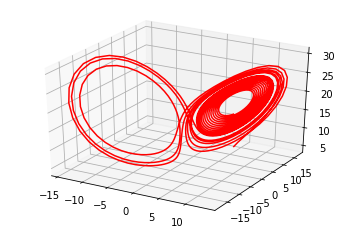

In [188]:
initial_condition = [x,y,z]

solution =odeint(module,initial_condition,tSpan) 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xdata = solution[:,0]
ydata = solution[:,1]
zdata = solution[:,2]
ax.plot3D(xdata, ydata, zdata, 'red')
plt.savefig('D:/rani/parameter_variation/rho_20.png' )

plt.show()

In [ ]:
### citation


 1. https://matplotlib.org/gallery/animation/simple_3danim.html
 2.  http://www2.me.rochester.edu/courses/ME406/webexamp5/loreq.pdf